# WeatherPy

Analysis:

•	The plot clearly shows the strong correlation between a distance from the equator and temperature. The further you are from the equator, the lesser is the temperature. As latitude increase or decreases from around the 0-20-degree range of latitudes, the temperature decreases. The further you are from the equator, the colder you would expect to be.

•	The second plot shows that the further to the North of the equator, such that 20-40 degrees, appears to be the most humid part of the world. On average, it appears that being north of the equator lends itself to a more humid environment vs. south of the equator.

•	The third plot clearly shows that there is no as such a strong correlation between cloudiness and latitude. It does not matter where you are, it could still be cloudy at any time. The highest concentration of high cloudiness corresponds to 40-80 from the equator. In fact, if we only look at cloudiness above 50%, the highest concentration remains with the largely far northern latitude cities. With respect to cloudiness between 5% and 50%, there appears to be no correlation with the latitude.

In [8]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import seaborn as sns
from datetime import datetime
from citipy import citipy
from ratelimiter import RateLimiter

## Generate Cities List

In [10]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# n determines how many cities to generate
# initialize the lists to track the cities

# chose 700 cities to get above the 500 city threshold
n = 700
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the randomly generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 

geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

,lat,lon
0,-37.218141,-11.537834
1,89.883554,-47.987513
2,-12.392374,-41.250168
3,-74.586458,75.324851
4,-45.832880,163.902777


In [12]:
# feed data to citipy
city = []
country = []


for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,jamestown,sh
1,upernavik,gl
2,vera cruz,br
3,saint-philippe,re
4,tuatapere,nz


In [13]:
weather_data=[]

In [14]:
# make API calls and collect data
url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
query_url = f"{url}appid={api_key}&units={units}&q="
query = f"{url}appid={api_key}&units={units}&q="


In [15]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=paamiut,GL
Processing record 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cabo san lucas,MX
Processing record 3 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tuatapere,NZ
Processing record 4 | kinablangan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kinablangan,PH
Processing record 5 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ribeira grande,PT
Processing record 6 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kodiak,US
Processing record 7 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6

Processing record 56 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus,ZA
Processing record 57 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ponta do sol,PT
Processing record 58 | eloy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=eloy,US
Processing record 59 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tasiilaq,GL
Processing record 60 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lebu,CL
Processing record 61 | simbahan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=simbahan,PH
Processing record 62 | ostroleka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=i

Processing record 112 | east london
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=east london,ZA
Processing record 113 | lincoln
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lincoln,US
Processing record 114 | gat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gat,LY
Processing record 115 | asfi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=asfi,MA
Processing record 116 | el alto
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=el alto,PE
Processing record 117 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vila franca do campo,PT
Processing record 118 | tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153e

Processing record 167 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beyneu,KZ
Processing record 168 | uk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=uk,RU
Processing record 169 | onega
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=onega,RU
Processing record 170 | moron
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=moron,MN
Processing record 171 | suda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=suda,RU
Processing record 172 | kuching
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kuching,MY
Processing record 173 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=salalah,OM
Proc

Processing record 223 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=iqaluit,CA
Processing record 224 | xiamen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=xiamen,CN
Processing record 225 | adana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=adana,TR
Processing record 226 | suntar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=suntar,RU
Processing record 227 | dubki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dubki,RU
Processing record 228 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kruisfontein,ZA
Processing record 229 | antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&unit

Processing record 279 | waipawa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=waipawa,NZ
Processing record 280 | ozinki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ozinki,RU
Processing record 281 | ahvaz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ahvaz,IR
Processing record 282 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tsihombe,MG
Processing record 283 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san cristobal,EC
Processing record 284 | ust-maya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ust-maya,RU
Processing record 285 | obo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&

Processing record 335 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=henties bay,NA
Processing record 336 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=atbasar,KZ
Processing record 337 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mys shmidta,RU
Processing record 338 | bourail
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bourail,NC
Processing record 339 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=egvekinot,RU
Processing record 340 | nueve de julio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nueve de julio,AR
Processing record 341 | maningrida
http://api.openweathermap.org/data/2.5/weather?appid=25

Processing record 391 | wilmington
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wilmington,US
Processing record 392 | mizpe ramon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mizpe ramon,IL
Processing record 393 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san patricio,MX
Processing record 394 | bacalar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bacalar,MX
Processing record 395 | kuche
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kuche,CN
Processing record 396 | karoi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=karoi,ZW
Processing record 397 | ocos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b

Processing record 447 | tocopilla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tocopilla,CL
Processing record 448 | freeport
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=freeport,US
Processing record 449 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sorvag,FO
Processing record 450 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=palabuhanratu,ID
Processing record 451 | fare
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fare,PF
Processing record 452 | kisangani
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kisangani,CD
Processing record 453 | nizwa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0

Processing record 502 | north platte
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=north platte,US
Processing record 503 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marawi,SD
Processing record 504 | huicungo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=huicungo,PE
Processing record 505 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=plettenberg bay,ZA
Processing record 506 | zhoucun
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zhoucun,CN
Processing record 507 | hokitika
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hokitika,NZ
Processing record 508 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1

Processing record 558 | noumea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=noumea,NC
Processing record 559 | sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sept-iles,CA
Processing record 560 | wagar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wagar,SD
Processing record 561 | miri
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=miri,MY
Processing record 562 | xixiang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=xixiang,CN
Processing record 563 | dryden
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dryden,CA
Processing record 564 | kholmogory
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperia

Processing record 614 | san borja
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san borja,BO
Processing record 615 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kavaratti,IN
Processing record 616 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=namatanai,PG
Processing record 617 | marystown
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marystown,CA
Processing record 618 | labytnangi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=labytnangi,RU
Processing record 619 | northam
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=northam,AU
Processing record 620 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f15

Processing record 670 | yuxia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yuxia,CN
Processing record 671 | quatis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=quatis,BR
Processing record 672 | sola
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sola,VU
Processing record 673 | nemuro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nemuro,JP
Processing record 674 | bushehr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bushehr,IR
Processing record 675 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ugoofaaru,MV
Processing record 676 | nishihara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 607 unique cities.


In [17]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,paamiut,61.99,-49.67,100.0,32.80,20,37.85,1.542497e+09,GL
1,cabo san lucas,22.89,-109.91,41.0,78.80,20,10.29,1.542495e+09,MX
2,tuatapere,-46.13,167.69,100.0,41.62,92,18.61,1.542497e+09,NZ
3,kinablangan,7.69,126.55,100.0,78.30,48,10.67,1.542497e+09,PH
4,ribeira grande,38.52,-28.70,99.0,64.03,68,12.57,1.542497e+09,PT


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

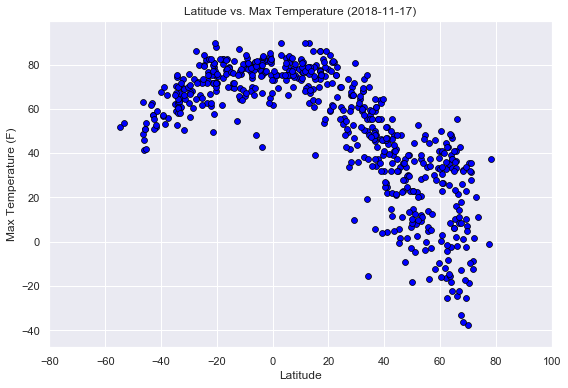

In [18]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[1,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.show()

#### Latitude vs. Humidity Plot

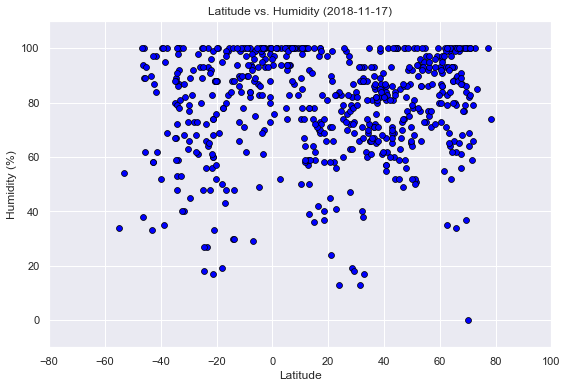

In [19]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[1,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Cloudiness Plot

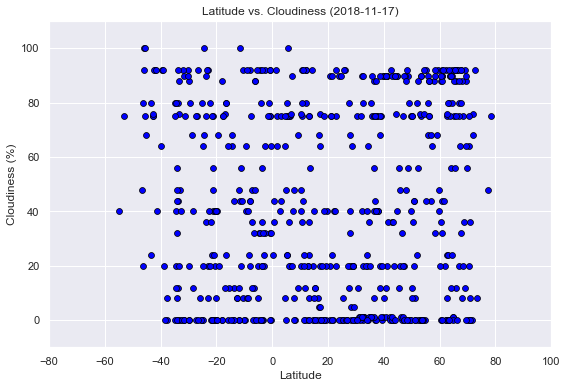

In [20]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[1,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Wind Speed Plot

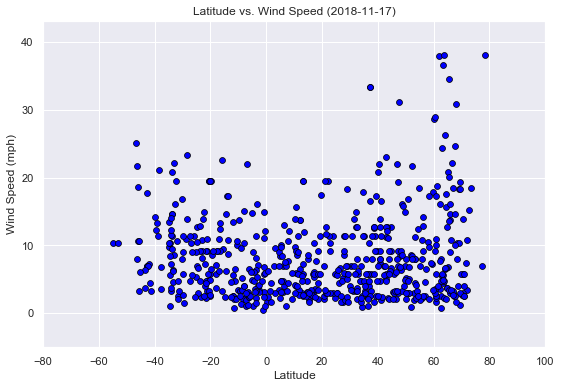

In [21]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[1,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()